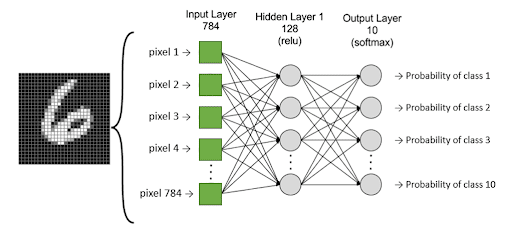

In [60]:
# Je declare que ce code est de moi, et que je n'ai pas copié d'autres personnes.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets   import make_blobs
from sklearn.metrics import accuracy_score
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV

In [12]:

np.random.seed(42)  # Pour la reproductibilité

eXperience_years = np.random.randint(0, 15, size=100)  # Expérience entre 0 et 14 ans
projet = np.random.randint(0, 10, size=100)           # Nombre de projets entre 0 et 9

# Règle simple : embaucher si experience + projet > 12, sinon non
embaucher = np.where(experience_years + projet > 12, 1, -1)

dat = {
    'experience_years': experience_years.tolist(),
    'projet': projet.tolist(),
    'embaucher': embaucher.tolist()
}

# Affichage rapide des 10 premiers exemples
for i in range(10):
    print(f"Exp: {dat['experience_years'][i]}, Projet: {dat['projet'][i]}, Embaucher: {dat['embaucher'][i]}")


Exp: 6, Projet: 1, Embaucher: -1
Exp: 3, Projet: 9, Embaucher: -1
Exp: 12, Projet: 3, Embaucher: 1
Exp: 14, Projet: 7, Embaucher: 1
Exp: 10, Projet: 6, Embaucher: 1
Exp: 7, Projet: 8, Embaucher: 1
Exp: 12, Projet: 7, Embaucher: 1
Exp: 4, Projet: 4, Embaucher: -1
Exp: 6, Projet: 1, Embaucher: -1
Exp: 9, Projet: 4, Embaucher: 1


In [4]:
data=pd.DataFrame(dat)
data

,experience_years,projet,embaucher
0,6,1,-1
1,3,9,-1
2,12,3,1
3,14,7,1
4,10,6,1
...,...,...,...
95,12,7,1
96,14,5,1
97,1,7,-1
98,9,8,1


In [49]:
X=data[['experience_years','projet']].to_numpy()
Y=data['embaucher'].to_numpy().reshape(-1,1)
X.shape,Y.reshape(-1,1).shape

((100, 2), (100, 1))

In [50]:
X,Y

(array([[ 6,  1],
        [ 3,  9],
        [12,  3],
        [14,  7],
        [10,  6],
        [ 7,  8],
        [12,  7],
        [ 4,  4],
        [ 6,  1],
        [ 9,  4],
        [ 2,  7],
        [ 6,  9],
        [10,  8],
        [10,  8],
        [ 7,  0],
        [ 4,  8],
        [ 3,  6],
        [ 7,  8],
        [ 7,  7],
        [ 2,  0],
        [ 5,  7],
        [ 4,  7],
        [ 1,  2],
        [ 7,  0],
        [11,  7],
        [13,  2],
        [ 5,  2],
        [ 1,  0],
        [11,  4],
        [ 4,  9],
        [ 0,  6],
        [11,  9],
        [ 9,  8],
        [ 5,  6],
        [12,  8],
        [11,  7],
        [ 8,  1],
        [ 0,  0],
        [10,  6],
        [10,  6],
        [14,  7],
        [ 9,  4],
        [11,  2],
        [11,  7],
        [14,  5],
        [13,  2],
        [13,  0],
        [14,  2],
        [13,  4],
        [ 2,  2],
        [11,  0],
        [ 6,  4],
        [ 3,  9],
        [ 8,  6],
        [ 2,  6],
        [ 

# Forward propagation

## Neurone

In [51]:
def models(x,w,b):
    return x.dot(w)+b
def activation(z):
    return 1/(1+np.exp(-z))
def loss(A,Y):
    return -np.mean(Y*np.log(A)+(1-Y)*np.log(1-A))

# Back propagation

## Gradient

In [52]:
def dz2_fonction(A,Y):
    return A-Y
def dz1_fonction(dz2,w2,A1):
    return dz2.dot(w2.T)*(A1*(1-A1))

def gradient_w(x,dz1,m):
    return (x.T.dot(dz1))/m
def gradient_b(dz1,m):
    return (np.sum(dz1,axis=0,keepdims=True))/m

# Reseau de neurone

In [61]:
def reseau_neurone(x,y,w1,b1,w2,b2,epoch=100,learning_rate=0.1):
    m=x.shape[0]
    loss_graph=[]
    for i in range(epoch):
        Z1=models(x,w1,b1)
        A1=activation(Z1)
        Z2=models(A1,w2,b2)
        A2=activation(Z2)
        l=loss(A2,y)
        loss_graph.append(l)
        dz2=dz2_fonction(A2,y)
        dz1=dz1_fonction(dz2,w2,A1)
        w1=w1 - learning_rate * gradient_w(x,dz1,m)
        b1=b1 - learning_rate * gradient_b(dz1,m)
        w2=w2 - learning_rate * gradient_w(A1,dz2,m)
        b2=b2 - learning_rate * gradient_b(dz2,m)
        if i%10==0:
            print(l)
        plt.plot(loss_graph)
    return w1,b1,w2,b2

# Initialisation

In [62]:
def init_weights(nbr_neurons,nbr_inputs):
    w=np.zeros((nbr_inputs,nbr_neurons))
    b=np.zeros((1,nbr_neurons))
    return  w,b

0.6931471805599453
0.4820438100547107
0.35108207169438804
0.24086167101198008
0.14314223489284233
0.05341066097898569
-0.030053807348483792
-0.10893001686797918
-0.18476627816663804
-0.2588083080430129
-0.3320120739255769
-0.4051134822595154
-0.47869642134564144
-0.5532460547148719
-0.6291882408929221
-0.7069186510105381
-0.7868248204917201
-0.8693034958654399
-0.9547748425058071
-1.0436944631568759


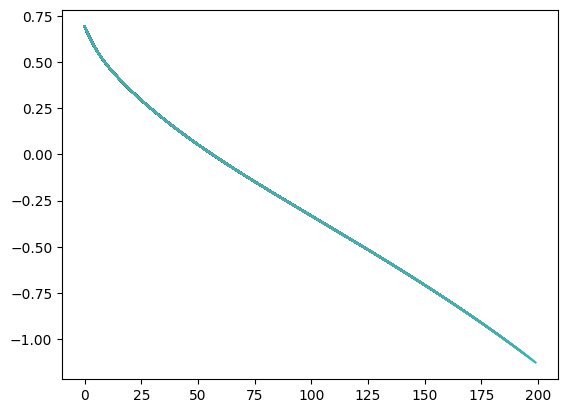

In [65]:
n0=X.shape[1]
n1=2
n2=1
w1,b1=init_weights(n1,n0)
w2,b2=init_weights(n2,n1)

w1,b1,w2,b2=reseau_neurone(X,Y,w1,b1,w2,b2,epoch=200)